# Diabet prediction
-----------------
## EDA

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./datasets/diabetes_data.csv')
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


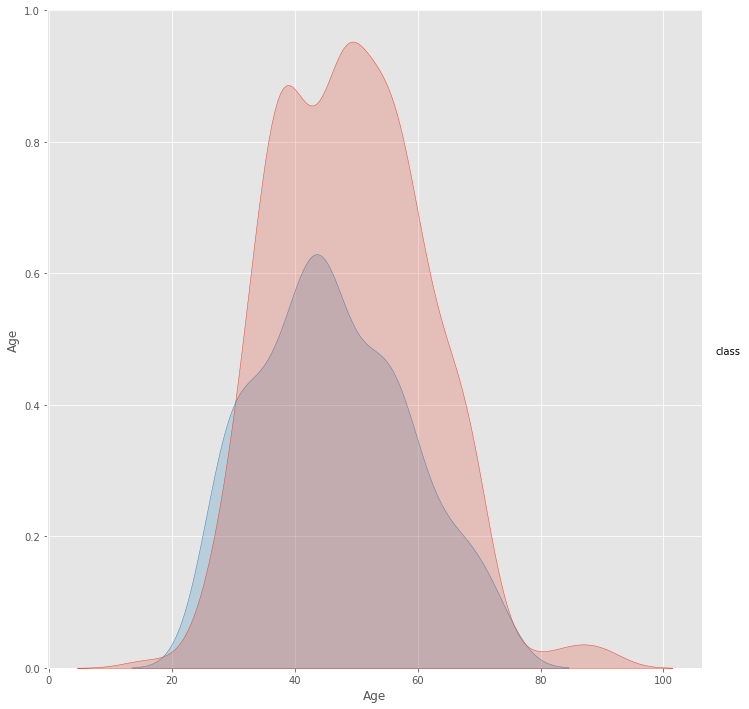

In [3]:
sns.pairplot(data, hue='class', height=10);

## Feature Engineering
-----------------
### One-Hot Encoding

In [4]:
data = pd.get_dummies(data,columns=[x for x in data.columns if x not in ['Age']], drop_first=True)

In [5]:
data

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [6]:
data['class'] = data['class_Positive']
del data['class_Positive']

### Feature Selection

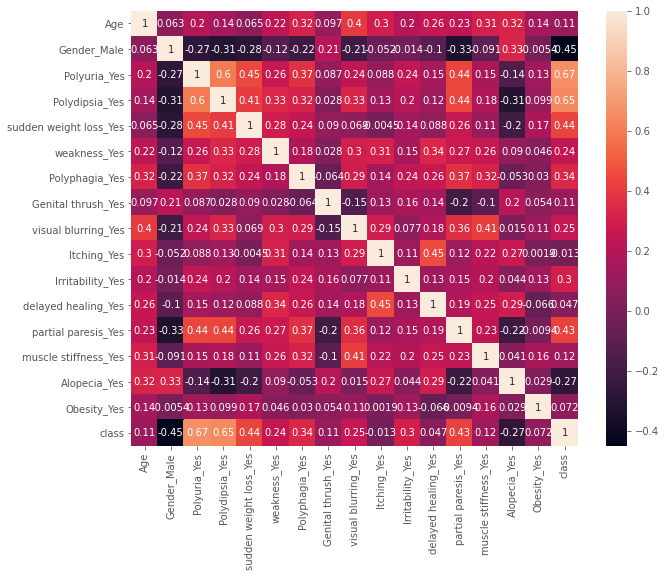

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True);

## Model Selection
------------
### Train-test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis=1),data['class'], test_size=0.3, 
                                                    random_state=42)

### Upsampling

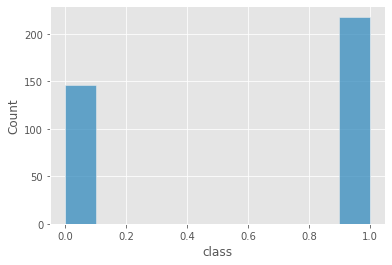

In [9]:
sns.histplot(y_train);

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_upsampled, y_upsampled = sm.fit_resample(X_train, y_train)

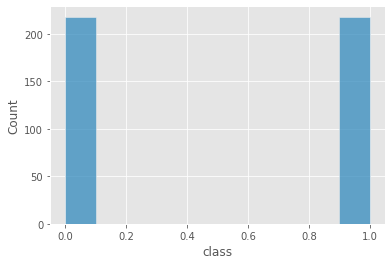

In [11]:
sns.histplot(y_upsampled);

### Baseline

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.ones(len(y_test))))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       102

    accuracy                           0.65       156
   macro avg       0.33      0.50      0.40       156
weighted avg       0.43      0.65      0.52       156



### KNN with CV

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors':list(range(1,101))})
knn_model.fit(X_train,y_train)
print(classification_report(y_test,knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.98      0.90      0.94       102

    accuracy                           0.92       156
   macro avg       0.91      0.93      0.92       156
weighted avg       0.93      0.92      0.92       156



In [25]:
knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

### Logistic Regression with CV

In [20]:
from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(cv=4)
lr_model.fit(X_train,y_train)
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [27]:
lr_model.coef_

array([[-0.0363177 , -2.8070822 ,  2.99732091,  3.24780938,  0.90932795,
         0.61715604,  0.35691047,  1.57612172,  0.90720398, -1.75609413,
         1.62405394, -0.59235829,  1.14106248, -0.34582012,  0.05559977,
        -0.24658524]])

In [26]:
featureImportance = pd.DataFrame({"feature": data.drop('class',axis=1).columns, 
                                  "importance": lr_model.coef_[0]})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

Exception: Data must be 1-dimensional